In [1]:
from qiskit import (QuantumRegister,ClassicalRegister,QuantumCircuit,BasicAer,execute)
from qiskit.visualization import plot_histogram,plot_state_city
from qiskit import IBMQ,providers

In [2]:
qr=QuantumRegister(2)
cr=ClassicalRegister(2)
backend=BasicAer.get_backend('statevector_simulator')

In [3]:
circuit=QuantumCircuit(qr,cr)
circuit.h(0)
circuit.x(1)
circuit.measure([0,1],[0,1])
print(circuit.draw())

      ┌───┐┌─┐   
q0_0: ┤ H ├┤M├───
      ├───┤└╥┘┌─┐
q0_1: ┤ X ├─╫─┤M├
      └───┘ ║ └╥┘
c0: 2/══════╩══╩═
            0  1 


[0.+0.j 0.+0.j 0.+0.j 1.+0.j]


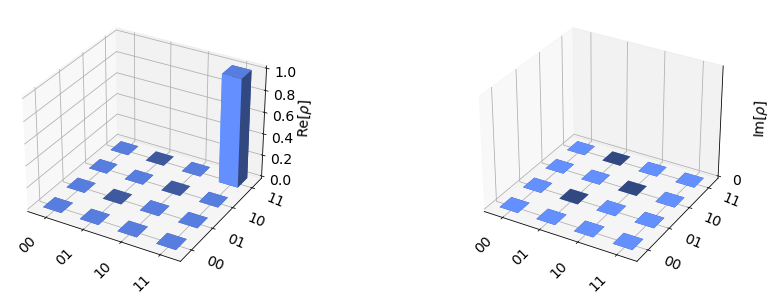

In [4]:
job=execute(circuit,backend)
result=job.result()
print(result.get_statevector(circuit))
plot_state_city(result.get_statevector(circuit))

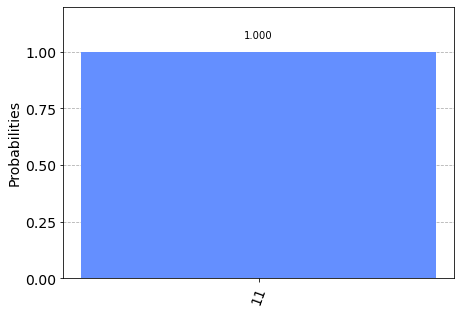

In [5]:
plot_histogram(result.get_counts())

In [6]:
backend1=BasicAer.get_backend('qasm_simulator')
job1=execute(circuit,backend1,shots=10000)
result1=job1.result()

In [7]:
print(result1)
#plot_state_city(result1.get_counts)

Result(backend_name='qasm_simulator', backend_version='2.0.0', qobj_id='af0ac32c-0f0b-4c17-a112-b72065647f8d', job_id='8b41ad26-a8b1-49b9-a1b2-f3a8c2c3ee26', success=True, results=[ExperimentResult(shots=10000, success=True, meas_level=MeasLevel.CLASSIFIED, data=ExperimentResultData(counts={'0x2': 5032, '0x3': 4968}), header=QobjExperimentHeader(clbit_labels=[['c0', 0], ['c0', 1]], creg_sizes=[['c0', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='circuit7', qreg_sizes=[['q0', 2]], qubit_labels=[['q0', 0], ['q0', 1]]), status=DONE, name='circuit7', seed_simulator=1158379003, time_taken=0.03137636184692383)], status=COMPLETED, status=QobjHeader(backend_name='qasm_simulator', backend_version='2.0.0'), time_taken=0.03137636184692383)


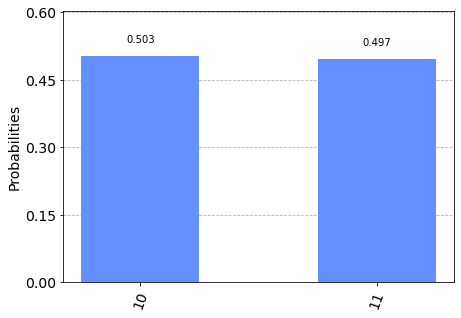

In [8]:
plot_histogram(result1.get_counts())

In [5]:
token='024257bbd2ae5845824e3650cd45561fca6cdff0284dc34870113b886144a3ded1c691a8d263d37fb3e5b282a5a5bcdf4573296e632221992acf75cfabb1f65c'
IBMQ.save_account(token=token)
IBMQ.load_account()
provider = IBMQ.get_provider()
system = provider.backends()

configrc.store_credentials:WARNING:2021-02-17 13:18:11,356: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2021-02-17 13:18:12,400: Credentials are already in use. The existing account in the session will be replaced.


In [46]:
system

[<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [89]:
k=[i for i in system.__iter__()]

<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>

In [83]:
provider.backends(simulator=True)

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [96]:
_filteredproviders=[_ for _ in provider.backends(simulator=False).__iter__() if provider.get_backend(str(_)).configuration().n_qubits>=4]

In [95]:
for _ in provider.backends(simulator=False).__iter__():
    print(str(_))

ibmqx2
ibmq_16_melbourne
ibmq_armonk
ibmq_athens
ibmq_santiago
ibmq_lima
ibmq_quito


In [6]:
dir(provider)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_api_client',
 '_backends',
 '_discover_remote_backends',
 '_experiment',
 'backends',
 'credentials',
 'experiment',
 'get_backend',
 'random']

In [3]:
qr1=QuantumRegister(3)
cr1=ClassicalRegister(3)
qc1=QuantumCircuit(qr1,cr1)
qc1.h(range(3))
qc1.measure(range(3),range(3))
qc1.draw()

┌───┐┌─┐      
q1_0: ┤ H ├┤M├──────
      ├───┤└╥┘┌─┐   
q1_1: ┤ H ├─╫─┤M├───
      ├───┤ ║ └╥┘┌─┐
q1_2: ┤ H ├─╫──╫─┤M├
      └───┘ ║  ║ └╥┘
c1: 3/══════╩══╩══╩═
            0  1  2

In [27]:
job=execute(qc1,backend=provider.get_backend('ibmq_lima'),shots=1)
job.result()

Result(backend_name='ibmq_qasm_simulator', backend_version='0.7.0', qobj_id='2e9f091f-7d8f-4012-b8a3-bf23919cbcc4', job_id='602cceaed59d26434a14f017', success=True, results=[ExperimentResult(shots=2, success=True, meas_level=MeasLevel.CLASSIFIED, data=ExperimentResultData(counts={'0x0': 1, '0x4': 1}), header=QobjExperimentHeader(clbit_labels=[['c1', 0], ['c1', 1], ['c1', 2]], creg_sizes=[['c1', 3]], global_phase=0.0, memory_slots=3, n_qubits=3, name='circuit8', qreg_sizes=[['q1', 3]], qubit_labels=[['q1', 0], ['q1', 1], ['q1', 2]]), status=DONE, metadata={'fusion': {'applied': False, 'enabled': True, 'method': 'unitary', 'threshold': 14}, 'measure_sampling': True, 'method': 'statevector', 'parallel_shots': 1, 'parallel_state_update': 16}, seed_simulator=4036372501, time_taken=0.00022659400000000002)], date=2021-02-17 13:37:14.180958+05:30, status=COMPLETED, status=QobjHeader(backend_name='ibmq_qasm_simulator', backend_version='0.1.547'), metadata={'max_memory_mb': 257936, 'omp_enabled'

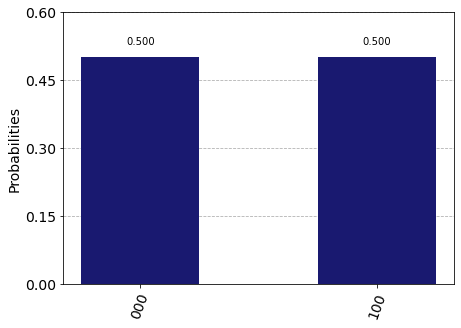

In [28]:
plot_histogram(job.result().get_counts(),color='MidnightBlue')

In [5]:
import pennylane as qml
dev=qml.device('default.qubit',wires=1)

In [7]:
@qml.qnode(dev)
def circuit(params):
    qml.RX(params[0],wires=0)
    qml.RY(params[1],wires=0)
    return qml.expval(qml.PauliZ(0))

In [14]:
y=qml.draw(circuit)
y([0.67,0.34])

AttributeError: 'QNode' object has no attribute 'full_representation_grid'